In [33]:
#imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
#import dataset
df=pd.read_csv(r"D:\ML_projects\customer_churn_prediction\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
df.shape


(7043, 21)

In [24]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 1. Target Distribution


In [31]:
churn_count=df["Churn"].value_counts()
churn_percent=df["Churn"].value_counts(normalize=True)*100
churn_percent=churn_percent.round(2)
print(churn_count)
print(churn_percent)

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


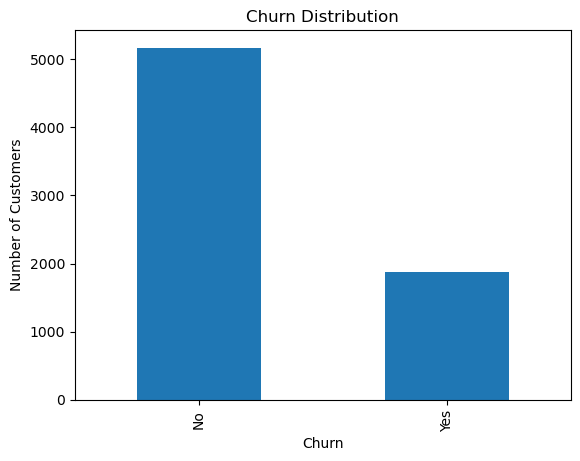

In [34]:
churn_count.plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

Text(0, 0.5, 'Number of Customers')

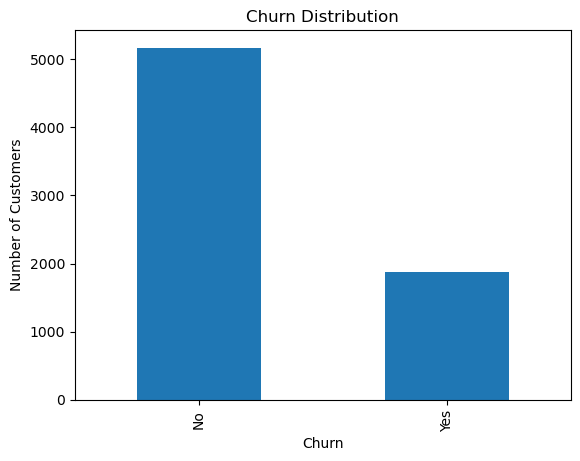

In [ ]:
ax = churn_count.plot(kind='bar', title='Churn Distribution')
ax.set_xlabel('Churn')
ax.set_ylabel('Number of Customers')

Moderate imbalance between prediction target.
Need to balance it

# 2. Missing Values Analysis


In [37]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [44]:
#Total charges should be an integer but its an object
df["TotalCharges"].unique()[:25]

array(['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5',
       '1949.4', '301.9', '3046.05', '3487.95', '587.45', '326.8',
       '5681.1', '5036.3', '2686.05', '7895.15', '1022.95', '7382.25',
       '528.35', '1862.9', '39.65', '202.25', '20.15', '3505.1', '2970.3'],
      dtype=object)

In [45]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')

In [46]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [49]:
df=df.dropna(subset=["TotalCharges"])
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 3. Feature Types


In [50]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

| Column Name      | Pandas dtype | Logical Type       | Required Preprocessing      |
| ---------------- | ------------ | ------------------ | --------------------------- |
| customerID       | object       | Identifier         | Drop (no predictive value)  |
| gender           | object       | Categorical        | One-hot encode              |
| SeniorCitizen    | int64        | Binary categorical | None (already 0/1)          |
| Partner          | object       | Binary categorical | Label encode (Yes/No → 1/0) |
| Dependents       | object       | Binary categorical | Label encode                |
| tenure           | int64        | Numeric            | Scale                       |
| PhoneService     | object       | Binary categorical | Label encode                |
| MultipleLines    | object       | Categorical        | One-hot encode              |
| InternetService  | object       | Categorical        | One-hot encode              |
| OnlineSecurity   | object       | Binary categorical | Label encode                |
| OnlineBackup     | object       | Binary categorical | Label encode                |
| DeviceProtection | object       | Binary categorical | Label encode                |
| TechSupport      | object       | Binary categorical | Label encode                |
| StreamingTV      | object       | Binary categorical | Label encode                |
| StreamingMovies  | object       | Binary categorical | Label encode                |
| Contract         | object       | Categorical        | One-hot encode              |
| PaperlessBilling | object       | Binary categorical | Label encode                |
| PaymentMethod    | object       | Categorical        | One-hot encode              |
| MonthlyCharges   | float64      | Numeric            | Scale                       |
| TotalCharges     | float64      | Numeric            | Scale                       |
| Churn            | object       | Target (binary)    | Label encode (Yes/No → 1/0) |


# 4. Univariate Analysis


## 4.1 Numerical Features


In [51]:
df[["tenure",'MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


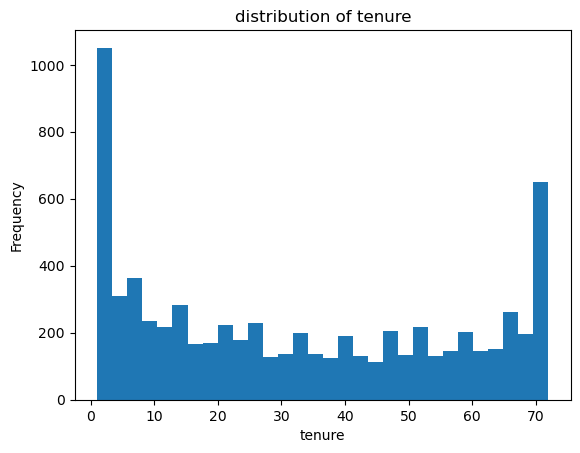

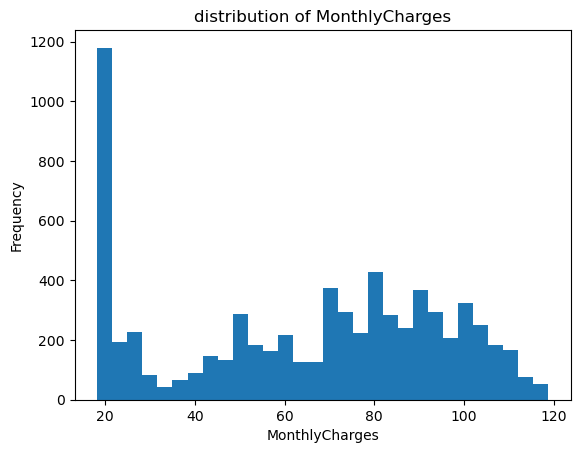

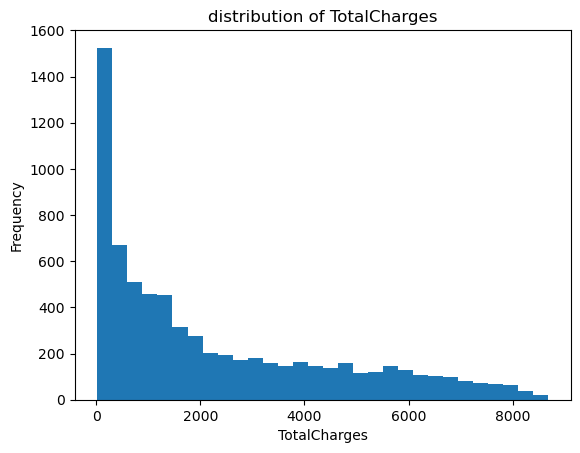

In [54]:
num_columns=["tenure",'MonthlyCharges','TotalCharges']

for c in num_columns:
    df[c].plot(kind="hist",bins=30)
    plt.title(f"distribution of {c}")
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.show()

Tenure shows a bimodal distribution, indicating a mix of new customers and long-term loyal customers.
Monthly charges range widely with no extreme outliers, suggesting pricing tiers rather than anomalies.
TotalCharges is heavily right-skewed, as long-tenure customers accumulate higher total payments over time.

## 4.2 Categorical Features


In [57]:
cat_columns=df.select_dtypes(include='object').columns
for c in cat_columns:
    print(c)
    print(df[c].value_counts())

customerID
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    1
7795-CFOCW    1
             ..
8091-TTVAX    1
7469-LKBCI    1
9763-GRSKD    1
6388-TABGU    1
7892-POOKP    1
Name: count, Length: 7032, dtype: int64
gender
gender
Male      3549
Female    3483
Name: count, dtype: int64
Partner
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Dependents
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
PhoneService
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
MultipleLines
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
InternetService
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
OnlineSecurity
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
OnlineBackup
OnlineBackup
No                     3087
Yes                    2425
No intern

 
Gender distribution is nearly balanced, suggesting minimal bias from this feature.

 
The majority of customers are not senior citizens, indicating an underrepresented older population.

 
Most customers are on month-to-month contracts (~55%), which may correlate with higher churn risk.

 
Fiber optic is the most common internet service, followed by DSL.

 
Electronic check is the most frequently used payment method.

 
The target variable shows moderate imbalance, with non-churners forming the majority.

# 5. Churn Correlation Analysis


In [58]:
df['churn_num']=df['Churn'].map({'Yes':1,'No':0})

                  mean  count
InternetService              
DSL              0.190   2416
Fiber optic      0.419   3096
No               0.074   1520


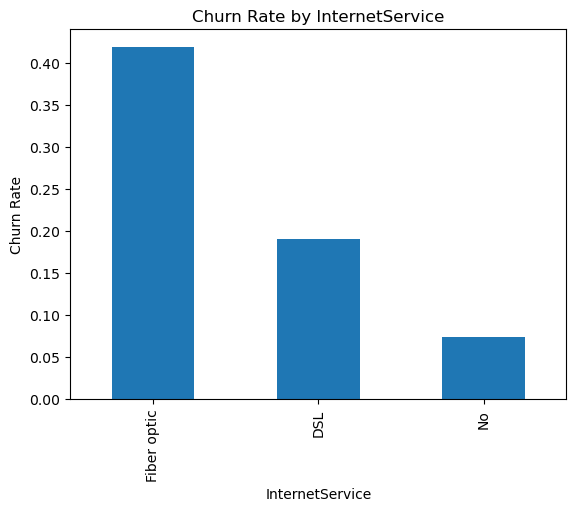

                 mean  count
Contract                    
Month-to-month  0.427   3875
One year        0.113   1472
Two year        0.028   1685


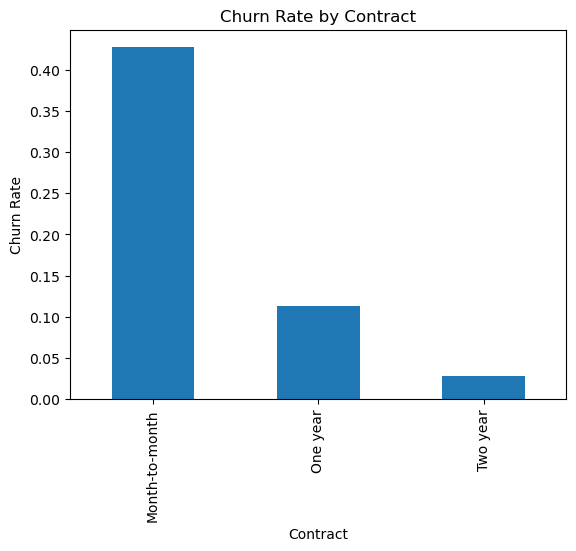

                            mean  count
PaymentMethod                          
Bank transfer (automatic)  0.167   1542
Credit card (automatic)    0.153   1521
Electronic check           0.453   2365
Mailed check               0.192   1604


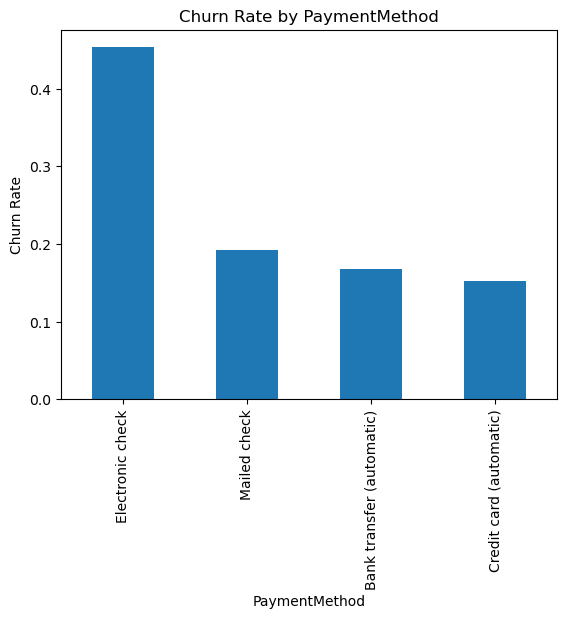

                mean  count
SeniorCitizen              
0              0.237   5890
1              0.417   1142


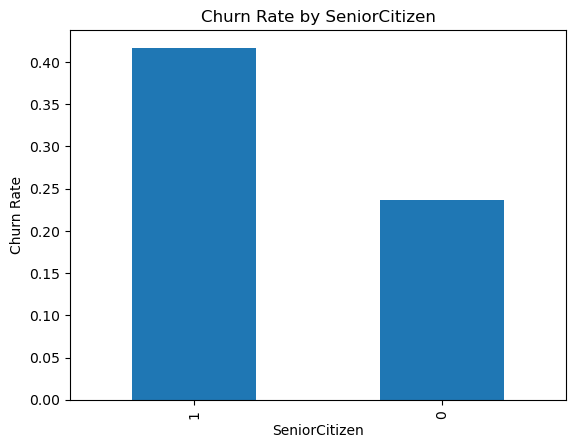

                      mean  count
OnlineSecurity                   
No                   0.418   3497
No internet service  0.074   1520
Yes                  0.146   2015


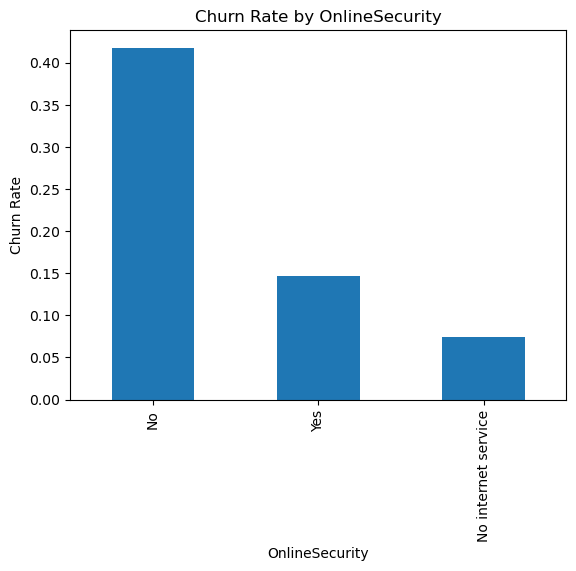

                      mean  count
TechSupport                      
No                   0.416   3472
No internet service  0.074   1520
Yes                  0.152   2040


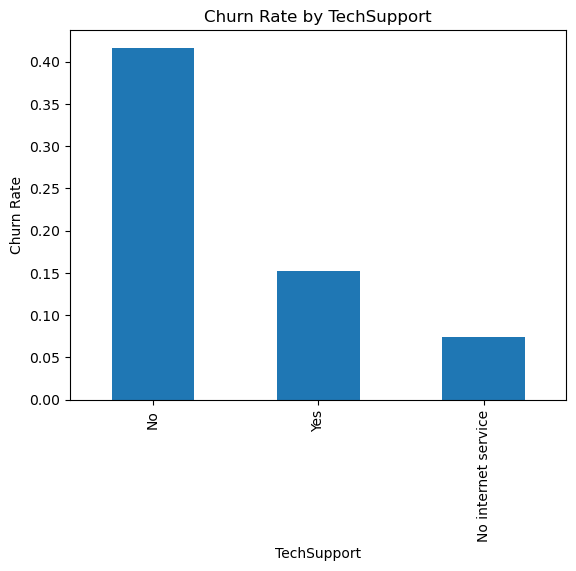

                      mean  count
StreamingTV                      
No                   0.335   2809
No internet service  0.074   1520
Yes                  0.301   2703


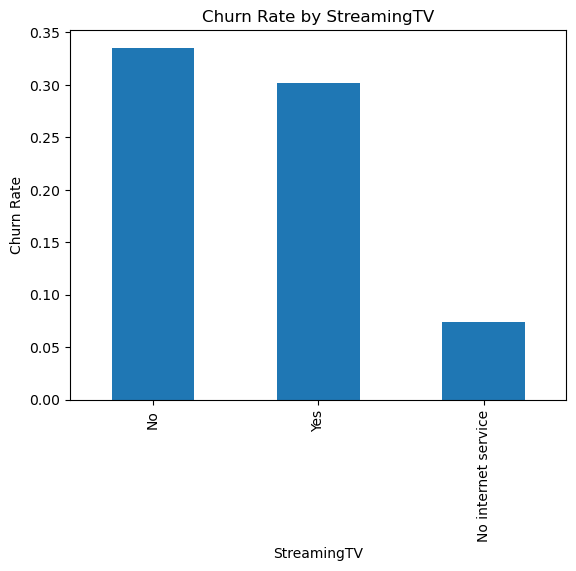

                   mean  count
PaperlessBilling              
No                0.164   2864
Yes               0.336   4168


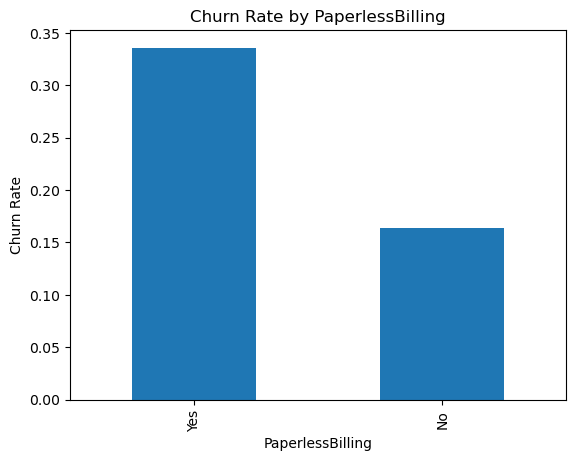

In [76]:
features = ['InternetService', 'Contract', 'PaymentMethod', 'SeniorCitizen',
            'OnlineSecurity', 'TechSupport', 'StreamingTV', 'PaperlessBilling']

for f in features:
    churn_rate=df.groupby(f)['churn_num'].mean().sort_values(ascending=False)
    print(df.groupby(f)['churn_num'].agg(['mean', 'count']).round(3))
    churn_rate.plot(kind='bar')
    plt.title(f'Churn Rate by {f}')
    plt.ylabel('Churn Rate')
    plt.show()

In [67]:
churned = df[df['Churn'] == 'Yes']
retained = df[df['Churn'] == 'No']

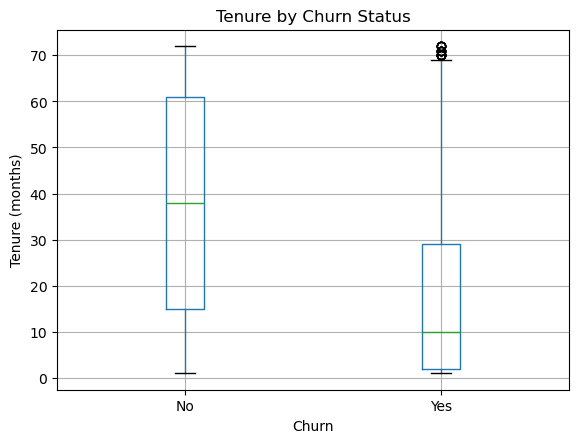

In [68]:
df.boxplot(column='tenure', by='Churn')
plt.title('Tenure by Churn Status')
plt.suptitle('')
plt.ylabel('Tenure (months)')
plt.show()

Churned customers have a much lower median tenure (~10 months) compared to retained customers (~38 months).

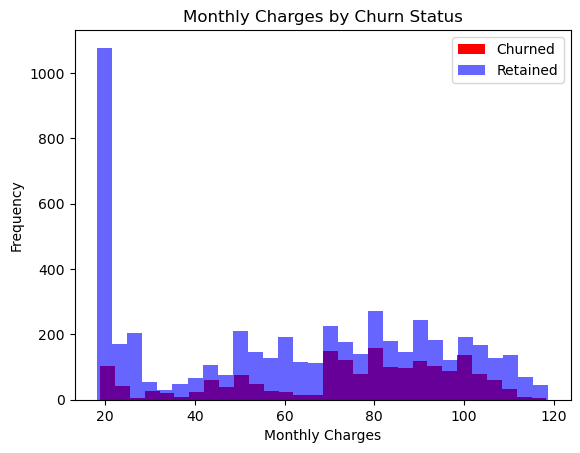

In [72]:
plt.hist(churned['MonthlyCharges'], bins=30, alpha=1,color='Red', label='Churned')
plt.hist(retained['MonthlyCharges'], bins=30, alpha=0.6,color='blue' ,label='Retained')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges by Churn Status')
plt.legend()
plt.show()


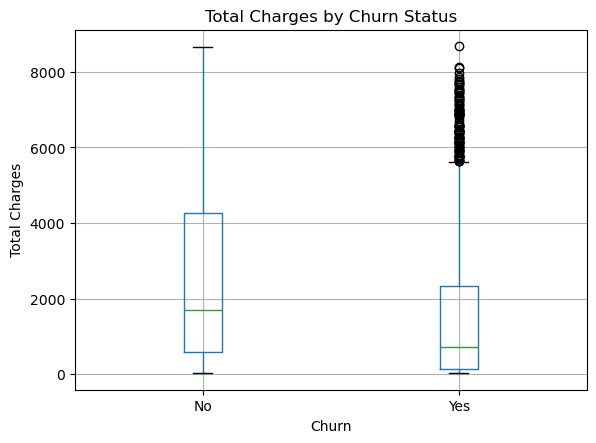

In [73]:
df.boxplot(column='TotalCharges', by='Churn')
plt.title('Total Charges by Churn Status')
plt.suptitle('')
plt.ylabel('Total Charges')
plt.show()


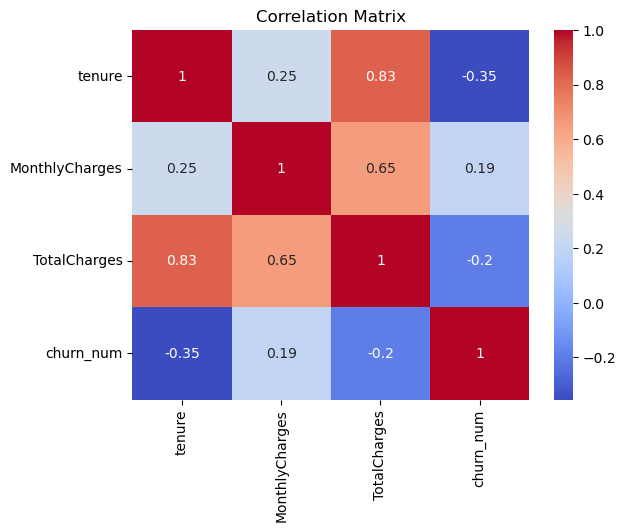

In [77]:
corr_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'churn_num']
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature ranking:The strongest predictors of churn appear to be Contract type, tenure, and MonthlyCharges, all showing large and consistent differences between churned and retained customers.

Supporting evidence

Month-to-month contracts have ~4–10× higher churn than long-term contracts,
Median tenure for churned customers is significantly lower,
Higher monthly charges correlate with increased churn

Retained customers have significantly higher total charges due to longer tenure, reinforcing tenure as a key driver.

Surprises :Fiber optic customers exhibit higher churn rates than DSL customers, which may reflect higher pricing or service expectation gaps.

# 6. Initial Hypotheses & Next Steps

# 6. Initial Hypotheses & Next Steps

## Feature Engineering Ideas
1. **Tenure buckets**: Group into 'New' (0-12), 'Established' (13-36), 'Loyal' (37+) — captures the bimodal distribution
2. **Service count**: Sum of add-on services (OnlineSecurity, TechSupport, StreamingTV, etc.) — hypothesis: more services = stickier customer
3. **Price-to-tenure ratio**: MonthlyCharges / (tenure + 1) — captures "value extraction rate"
4. **Contract-Tenure interaction**: Month-to-month + low tenure = highest risk segment
5. **Fiber optic flag**: Binary feature to isolate the surprise high-churn segment

## Modeling Implications
- Class imbalance (~73/27) requires SMOTE or class weights
- Contract type likely to be top feature — consider target encoding
- Tenure and MonthlyCharges may need scaling for distance-based models
- Consider cost-sensitive learning: false negatives (missed churners) more costly than false positives

## Next Steps
- [ ] Create engineered features
- [ ] Baseline models: Logistic Regression, Random Forest
- [ ] Address class imbalance with SMOTE/class weights
- [ ] Cost-sensitive optimization for business impact